# RQ4: Does the kind of event that is being focused on matter for mentions on *climate policy* or *climate action*?
---

The purpose of this notebook is to explore the context of climate policy and climate action semantically. For example, what is the different between the wildfires or the inaguration?

Created by Natalie Castro
Affiliation: University of Colorado at Boulder

## 1. Environment Creation

### 1.1 Library Import

In [1]:
''' FILE ACCESS '''

import json
import os
import glob
import smart_open

''' DATA QUERYING '''

import regex as re
import pandas as pd
import datetime
from datetime import datetime
from dateutil.parser import parse

''' THEMATIC ANALYSIS '''
from bertopic import BERTopic
#from transformers import AutoModel


''' TEXT PREPROCESSING '''
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
import regex as re

''' DATA VISUALIZATION '''

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sb

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Data Import

In [48]:
## Bluesky Posts
jan_sixth = pd.read_csv("Climate Posts January 6th.csv")
jan_ninth = pd.read_csv("Climate Posts January 9th.csv")
jan_twenty = pd.read_csv("Climate Posts January 20th.csv")

In [51]:
event1 = []
for i in range(0,len(jan_sixth)):
    event1.append('January 6th Capitol Protest')
    
event2 = []
for i in range(0,len(jan_ninth)):
    event2.append('2025 L.A. Wildfires')
    
event3 = []
for i in range(0,len(jan_twenty)):
    event3.append('President Donald Trump\'s Inaguration')
    
       
   

In [52]:
jan_sixth['Focusing Event'] = event1
jan_ninth['Focusing Event'] = event2
jan_twenty['Focusing Event'] = event3

In [3]:
## News Headlines 
news_sixth = pd.read_excel("Climate Headlines - January 6th.xlsx")
news_ninth = pd.read_excel("Climate Headlines - January 9th.xlsx")
news_twenty = pd.read_csv("Climate Headlines - January 20th.csv")

In [53]:
## Dropping the unneeded index files
jan_sixth.drop(columns='Unnamed: 0',inplace=True)
jan_ninth.drop(columns='Unnamed: 0',inplace=True)
jan_twenty.drop(columns='Unnamed: 0',inplace=True)
news_sixth.drop(columns='Unnamed: 0',inplace=True)
news_ninth.drop(columns='Unnamed: 0',inplace=True)
news_twenty.drop(columns='Unnamed: 0',inplace=True)

### 2.1 Removing Numbers + Punctuation

In [9]:
def number_remover(text):
    new_text = re.sub("\d","",text)
    clean_text = re.sub("[.,?!#$%<>\-_]","",new_text)
    return (clean_text)

In [10]:
number_remover('did you know that the earth was 8.5 million billion miles flat??1 wowwwie')

'did you know that the earth was  million billion miles flat wowwwie'

In [103]:
jan_sixth['clean text'] = jan_sixth['text'].apply(lambda x: number_remover(x))
jan_ninth['clean text'] = jan_ninth['text'].apply(lambda x: number_remover(x))
jan_twenty['clean text'] = jan_twenty['text'].apply(lambda x: number_remover(x))
news_sixth['clean text'] = news_sixth['headline clean'].apply(lambda x: number_remover(x))
news_ninth['clean text'] = news_ninth['headline clean'].apply(lambda x: number_remover(x))
news_twenty['clean text'] = news_twenty['headline clean'].apply(lambda x: number_remover(x))


In [104]:
posts_corpus = pd.concat([jan_sixth,jan_ninth,jan_twenty])
news_corpus = pd.concat([news_sixth,news_ninth,news_twenty])

In [105]:
posts = posts_corpus['clean text'].to_list()
news = news_corpus['clean text'].to_list()

In [106]:
print (f"The total climate posts is: {len(posts_corpus)}.\nThe total climate related news headlines is: {len(news_corpus)}")

The total climate posts is: 46846.
The total climate related news headlines is: 418


### 2.2 Filtering for climate, policy, action, co-occurance

In [107]:
import re
from collections import defaultdict

def count_bigrams(post):
    # Split the post into words by spaces
    words = post.split(" ")

    # Create a defaultdict to count bigrams
    bigram_counter = defaultdict(int)

    # Iterate through the words to form bigrams
    for i in range(len(words) - 1):
        # Create bigrams by pairing consecutive words
        bigram = (words[i], words[i + 1])

        # Use regex to filter out non-alphabetical characters from the words in the bigram
        bigram = tuple(re.findall(r'\D+', word)[0] if re.findall(r'\D+', word) else word for word in bigram)
        bigram = ' '.join(bigram)
        
        bigram_counter[bigram] += 1

    return dict(bigram_counter)


In [108]:
def vocab_creator(text):
    vocab = text.split(" ")
    return(vocab)

def climate_policy_action_finder(text):
    if 'climate' in text:
        if 'policy' in text:
            return (True)
        elif 'action' in text:
            return (True)
        
        else: 
            return (False)
    else:
        return (False)

In [109]:
test_text = "what is going on with the republicans climate policy? i want some action"


In [110]:
''' FINDING POSTS WITH CO-OCCURANCES'''
rq4_mask_posts = []
rq4_mask_news = []

for post in posts:
    rq4_mask_posts.append(climate_policy_action_finder(post))
    
for headline in news:
    rq4_mask_news.append(climate_policy_action_finder(headline))

In [111]:
rq4_posts = posts_corpus[rq4_mask_posts]

In [112]:
len(rq4_posts)

1621

In [113]:
rq4_headlines = news_corpus[rq4_mask_news]

In [114]:
len(rq4_headlines)

17

In [115]:
rq4_headlines['clean text'].to_list()

['figure class="srnoiv sahd lazyloadcontainer" style="responsivepictureaspectratioxs:;responsivepictureaspectratiosm:;responsivepictureaspectratiomd:;responsivepictureaspectratiolg:;responsivepictureaspectratioxl:;responsivepictureaspectratiowidexl:;"img alt=\'People hold a sign "When you change yourself you change the world" as they take part in a protest for climate action\' ariahidden="true" class="lqimg" src=""/img alt=\'People hold a sign "When you change yourself you change the world" as they take part in a protest for climate action\' class="hqimg" src="" title=\'People hold a sign "When you change yourself you change the world" as they take part in a protest for climate action\'//figure',
 'figure class="srnoiv sahd lazyloadcontainer" style="responsivepictureaspectratioxs:;responsivepictureaspectratiosm:;responsivepictureaspectratiomd:;responsivepictureaspectratiolg:;responsivepictureaspectratioxl:;responsivepictureaspectratiowidexl:;"img alt=\'People hold a sign "When you chan

In [116]:
rq4_headlines['clean text'] = ['People hold a sign "When you change yourself you change the world" as they take part in a protest for climate action',
                              'People hold a sign "When you change yourself you change the world" as they take part in a protest for climate action',
                              'Climate Skeptics Urge Trump to Boost Coal Gut Science in Agencies',
                              'Trump Climate Tipping Point',
                              'How Can Democrats Keep Climate Action Alive When Trump Returns',
                              'Climate Skeptics Urge Trump to Boost Coal Gut Science in Agencies',
                              'Trump Climate Tipping Point',
                              'How Can Democrats Keep Climate Action Alive When Trump Returns',
                               'Climate Skeptics Urge Trump to Boost Coal Gut Science in Agencies',
                              'Trump Climate Tipping Point',
                              'Trump to sign actions to pull US out of Paris climate agreement promote fossil fuels and mineral mining',
 'Trump to sign actions to pull US out of Paris climate agreement promote fossil fuels and mineral mining ',
 '‘Get rid of all cows’: Trump campaign spreads myths about Harris climate policy',
 'Biden becomes first US president to visit Amazon as Trump signals climate policy shift',
 'Trump’s orders freeze federal regulations withdraw US from Paris climate treaty revoke  of Biden’s presidential actions and more ',
 'Trump signs actions to pull US out of Paris climate agreement intends to promote fossil fuels and mineral mining ',
 'Trump signs actions to pull US out of Paris climate agreement intends to promote fossil fuels and mineral mining ']

In [117]:
rq4_headlines.drop(labels=[88,89,76,77,36,37],inplace=True)

In [118]:
set(rq4_headlines['clean text'].to_list())

{'How Can Democrats Keep Climate Action Alive When Trump Returns',
 'People hold a sign "When you change yourself you change the world" as they take part in a protest for climate action',
 'Trump signs actions to pull US out of Paris climate agreement intends to promote fossil fuels and mineral mining ',
 'Trump’s orders freeze federal regulations withdraw US from Paris climate treaty revoke  of Biden’s presidential actions and more ',
 '‘Get rid of all cows’: Trump campaign spreads myths about Harris climate policy'}

In [119]:
set(rq4_headlines['source'].to_list())

{'https://www.bloomberg.com/green',
 'https://www.cnn.com/',
 'https://www.cnn.com/climate',
 'https://www.dw.com/en/environment/s-11798',
 'https://www.france24.com/en/'}

## 3. Focusing Event Analysis 

### 3.1 What are the frequency of days which have the most co-occurances?

In [66]:
rq4_posts['Focusing Event'].value_counts()

2025 L.A. Wildfires                     976
President Donald Trump's Inaguration    511
January 6th Capitol Protest             134
Name: Focusing Event, dtype: int64

In [121]:
posts = rq4_posts['clean text'].to_list()

In [69]:
134/1621

0.08266502159161011

### 3.2 What are the other word counts?

In [122]:
word_counter = {"global warming":0,"climate change":0,"greenhouse gas":0,"greenhouse gases":0,
             "scientist":0,"scientists":0,"research":0,"researchers":0,"researching":0,"researched":0,
             "professor":0,"professors":0, "policy":0,"legislation":0,"FEMA":0,"management":0,"disaster respons":0,'government':0,
             'republican':0,'republicans':0,'GOP':0,'conservative':0,'conservatives':0,'MAGA':0,
             'democrat':0,'democrats':0,'liberal':0,'liberals':0,"DNC":0,
               'resilience':0,'just transition':0,'climate justice':0,'environmental justice':0,
                  'climate activism':0,'climate anxiety':0,'environmental racism':0,'ecoside':0,
               'insurrection':0,'wildfires':0,'inaguration':0}


In [123]:
import re
from collections import defaultdict

def count_bigrams(post):
    # Split the post into words by spaces
    words = post.split(" ")

    # Create a defaultdict to count bigrams
    bigram_counter = defaultdict(int)

    # Iterate through the words to form bigrams
    for i in range(len(words) - 1):
        # Create bigrams by pairing consecutive words
        bigram = (words[i], words[i + 1])

        # Use regex to filter out non-alphabetical characters from the words in the bigram
        bigram = tuple(re.findall(r'\D+', word)[0] if re.findall(r'\D+', word) else word for word in bigram)
        bigram = ' '.join(bigram)
        
        if bigram in list(word_counter.keys()):
        # Count the bigram occurrences
            bigram_counter[bigram] += 1

    return dict(bigram_counter)


In [124]:
def post_reader(post): 
    word_counter =  {"global warming":0,"climate change":0,"greenhouse gas":0,"greenhouse gases":0,
             "scientist":0,"scientists":0,"research":0,"researchers":0,"researching":0,"researched":0,
             "professor":0,"professors":0, "policy":0,"legislation":0,"FEMA":0,"management":0,"disaster respons":0,'government':0,
             'republican':0,'republicans':0,'GOP':0,'conservative':0,'conservatives':0,'MAGA':0,
             'democrat':0,'democrats':0,'liberal':0,'liberals':0,"DNC":0,
               'resilience':0,'just transition':0,'climate justice':0,'environmental justice':0,
                  'climate activism':0,'climate anxiety':0,'environmental racism':0,'ecoside':0,
               'insurrection':0,'wildfires':0,'inauguration':0}

      ## Identifying each word by splitting the tweet on blank or white spaces.
    words = post.split(" ")

      ## Iterating through each word and filtering out actual alphabetical characters using Regex
    for word in words:
        matches = re.findall('\D*',word)
        word = matches[0]
        if word in word_counter.keys():
            word_counter[word] = word_counter[word] + 1
        else:
            continue
            
            
    bigram_counts = count_bigrams(post)
    word_counter.update(bigram_counts)
            
    return(word_counter)

In [125]:
word_counts = {}
for post in posts:
    
    ## Reading the posts
    current_count = post_reader(post)
    
    # Saving the psots to a dictionary
    word_counts[post] = current_count

In [126]:
total_word_counts = pd.DataFrame(word_counts).transpose()

In [128]:
post_word_counts = total_word_counts.sum()

In [130]:
post_wcs = pd.DataFrame(post_word_counts)

In [133]:
post_wcs.sort_values(by=0,ascending=False)

,0
climate change,443
policy,354
wildfires,41
government,39
research,28
scientists,21
global warming,12
MAGA,11
resilience,10
legislation,10


## 4. Topic Modeling

In [91]:
climate_change = ["global warming","climate change","greenhouse gas","greenhouse gases"]
science = ["scientist","scientists","research","researchers","researching","researched",
           "professor","professors"]
policy_management = ["policy","legislation","FEMA","management","disaster respons",'government']

republican = ['republican','republicans','GOP','conservative','conservatives','MAGA']
democrat = ['democrat','democrats','liberal','liberals',"DNC"]

The dictionaries presented here were in relation specifically to windows of now

In [92]:
current_moment = ['resilience','just transition','climate justice','environmental justice',
                  'climate activism','climate anxiety','environmental racism','ecoside']

In [93]:
current_politics = ['insurrection','wildfires','inaguration']

In [94]:
dictionary_names = ["Climate Change","Science",'Policy','Republican','Democrat','Current Moment','Current Politics']
dictionary_list = [climate_change,science,policy_management,republican,democrat,current_moment,current_politics]

In [95]:
seed_topics = [climate_change,science,republican,democrat,policy_management,current_moment,current_politics]

In [84]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

In [96]:
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english",decode_error='replace',strip_accents='ascii',
                                  lowercase=True)
topic_model = BERTopic(vectorizer_model=vectorizer_model,verbose=True,seed_topic_list=seed_topics)

In [ ]:
  ## Using model.fit_transform, to apply to the list of documents. This will both embedd and assign topics to the texts in the document lists.
topics, probs = topic_model.fit_transform(posts)

In [135]:
cleaned_topics = topic_model.reduce_outliers(posts, topics)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.80it/s]


In [136]:
topic_model.update_topics(posts, topics=cleaned_topics)

2025-01-26 22:00:38,028 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [142]:
topic_info = topic_model.get_topic_info()

In [ ]:
# Access and modify topic representations
topics = topic_model.get_topics()
for topic_id, words in topics.items():
    # Filter out unwanted words from the topic representation
    topics[topic_id] = [(word, score) for word, score in words if word not in stopwords]

# Update the model with new topic representations
topic_model.update_topics(posts, topics=topics)


In [186]:
print(str(round(46/len(posts),4)*100)+"%")

2.8400000000000003%


In [184]:
cond = semantic_relations['value'] == 4
semantic_relations[cond]

,variable,value
34,research,4
38,researchers,4
49,researched,4
76,management,4
84,disaster respons,4
159,climate justice,4
167,climate activism,4


In [148]:
topic_info.to_csv("Focusing Event Topics.csv")

In [149]:
topic_names = topic_info[['Topic','Name']]

### Identfiying Semantic Topics

In [151]:
climate_words = list(word_counter.keys())

In [152]:
''' CREATING TOPICS FOR CLIMATE RELATED WORDS'''


semantic_topics_nested = []

for word in climate_words:

    related_tuple = topic_model.find_topics(search_term=word)

    related_topics = related_tuple[0]

    
    semantic_topics_nested.append(related_topics)

    
semantic_topics = sum(semantic_topics_nested, [])

In [155]:
climate_topics = topic_model.get_topics(semantic_topics,)

climate_topic_info = []

for topic in semantic_topics:
    current_info = topic_model.get_topic_info(topic)
    climate_topic_info.append(current_info)
    
climate_topics = pd.concat(climate_topic_info)

semantic_topics_nested = []
for word in climate_words:
    related_tuple = topic_model.find_topics(search_term=word)
    related_topics = related_tuple[0]
    
    semantic_topics_nested.append(related_topics)
    
semantic_topics = sum(semantic_topics_nested, [])

labels = {}
for nest in range(0,len(semantic_topics_nested)):
    topic_nest = semantic_topics_nested[nest]
    related_word = climate_words[nest]
    
    labels[related_word] = topic_nest

In [156]:
labels

{'global warming': [8, 6, 13, 11, 9],
 'climate change': [13, 8, 3, 9, 6],
 'greenhouse gas': [8, 13, 11, 3, 20],
 'greenhouse gases': [8, 1, 13, 11, 5],
 'scientist': [22, 8, 7, 11, 6],
 'scientists': [22, 8, 11, 7, 6],
 'research': [22, 19, 13, 11, 4],
 'researchers': [22, 19, 11, 4, 8],
 'researching': [22, 19, 8, 13, 15],
 'researched': [22, 8, 19, 15, 4],
 'professor': [14, 11, 7, 9, 2],
 'professors': [14, 22, 11, 7, 9],
 'policy': [13, 5, 9, 19, 11],
 'legislation': [12, 13, 7, 21, 19],
 'FEMA': [7, 1, 20, 18, 12],
 'management': [14, 4, 11, 19, 13],
 'disaster respons': [5, 13, 22, 1, 4],
 'government': [11, 9, 12, 14, 5],
 'republican': [14, 9, 11, 12, 2],
 'republicans': [14, 11, 9, 12, 5],
 'GOP': [14, 20, 9, 12, 21],
 'conservative': [9, 14, 3, 11, 2],
 'conservatives': [9, 14, 11, 3, 12],
 'MAGA': [7, 14, 12, 11, 9],
 'democrat': [14, 9, 7, 12, 3],
 'democrats': [14, 11, 9, 12, 7],
 'liberal': [9, 14, 19, 12, 21],
 'liberals': [9, 14, 11, 21, 3],
 'DNC': [14, 3, 9, 21, 7],

In [164]:
semantic_relations = pd.DataFrame(labels).melt()

In [165]:
semantic_relations.head()

,variable,value
0,global warming,8
1,global warming,6
2,global warming,13
3,global warming,11
4,global warming,9


In [166]:
cond = semantic_relations['value'] == 10
semantic_relations[cond]

,variable,value
147,resilience,10
151,just transition,10


## 7. Saving the Model to HuggingFace

In [144]:
from huggingface_hub import login

In [146]:
topic_model.save("bsky-posts-current-moment",serialization='pickle',save_embedding_model=True,save_ctfidf=True,)

2025-01-26 22:10:00,271 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.
C:\Users\natal\miniconda3\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [ ]:

# Push to HuggingFace Hub
topic_model.push_to_hf_hub(
    repo_id="nataliecastro/bsky-climate-posts-current-moment",
    save_ctfidf=True,
    private=True,
    commit_message='Adding the entire corpus of climate posts filtered for word co-occurance ',
    save_embedding_model=True,
)


## 5. Visualizing By Date

In [187]:
document_info = topic_model.get_document_info(posts)

In [188]:
topic_filtered = []

for topic in semantic_topics:
    current_condition = document_info['Topic'] == topic
    current_documents = document_info[current_condition]
    
    topic_filtered.append(current_documents)
    
climate_document_info = pd.concat(topic_filtered)

In [196]:
for_merge = rq4_posts[['clean text','Focusing Event']]

In [197]:
docs_for_merge = climate_document_info[['Document','Topic','Name']]

In [200]:
focusing_documents = docs_for_merge.merge(right=for_merge,right_on='clean text',left_on='Document')

In [201]:
focusing_documents.drop_duplicates(inplace=True)

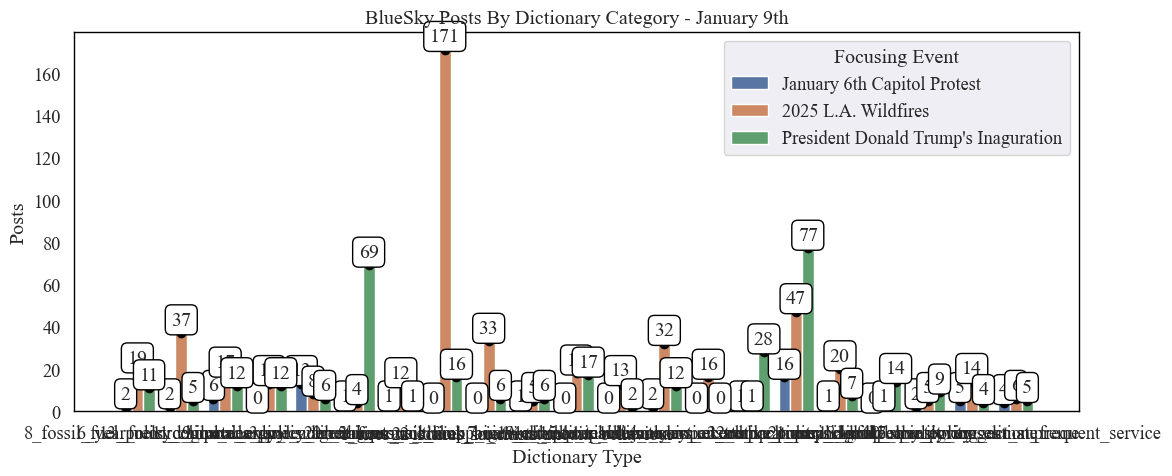

In [207]:
sb.set_style("white")
sb.set(font='Times New Roman', font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,5 )) 



hist = sb.countplot(focusing_documents,x="Name",hue='Focusing Event',)


for bar_group in hist.containers:  # `containers` contains the histogram bars grouped by hue
    # Get heights and centers for each group
    heights = [bar.get_height() for bar in bar_group]
    centers = [bar.get_x() + bar.get_width() / 2 for bar in bar_group]
    
    # Add markers
    plt.scatter(centers, heights, color='black', zorder=3)
    
    for center, height in zip(centers, heights):
        plt.text(
            center, 
            height, 
            f'{int(height):,}',  # Format with commas
            color='black', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )

for container in hist.containers:
    hist.bar_label(container, fmt='%d', label_type='edge', padding=3, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

hist.set_title("title")
hist.set_xlabel("Dictionary Type")
hist.set_ylabel("Posts")
ax.tick_params(axis='x')
ax.grid(True)
ax.set_facecolor("white")

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)


# Set the border (box) around the entire plot
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set the color of the border to black
    spine.set_linewidth(1)  # Set the width of the border

plt.tight_layout()

plt.show();

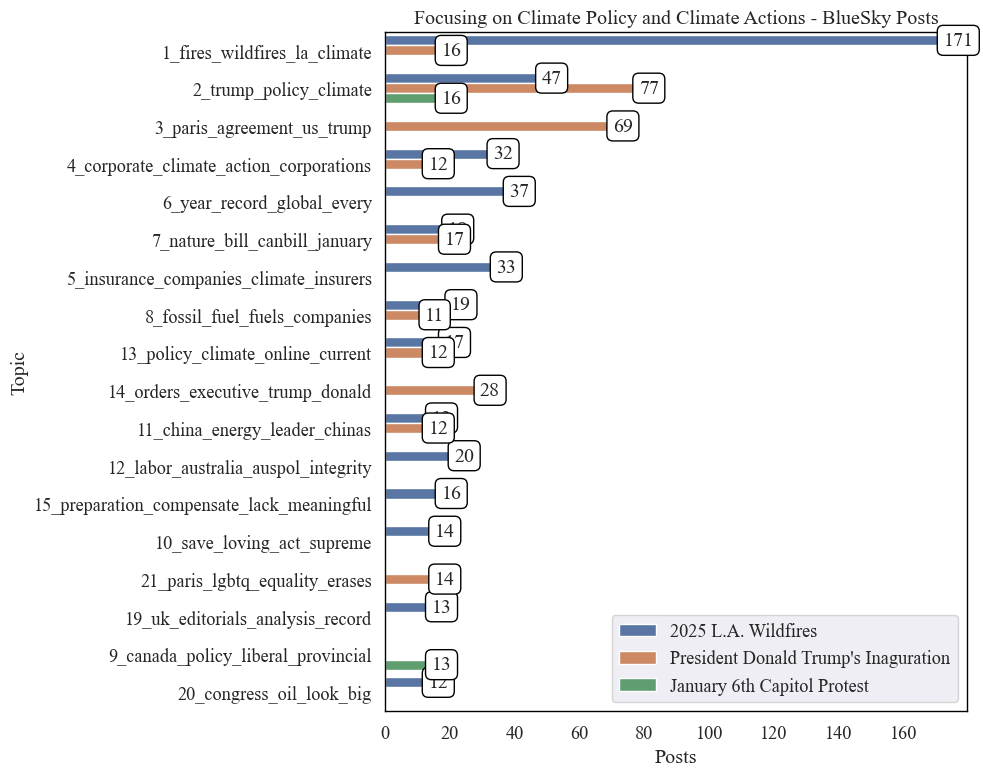

In [231]:
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

# Set style and font
sb.set_style("white")
sb.set(font='Times New Roman', font_scale=1.2)

# Set figure size
fig, ax = plt.subplots(figsize=(10, 8))  # Adjusted height for better y-axis spacing

# Define threshold
threshold = 10  # Adjust this value as needed

# Filter data where the count for a bar is greater than or equal to the threshold
filtered_data = focusing_documents.groupby(['Name', 'Focusing Event']).size().reset_index(name='Count')

# Drop rows with missing or non-finite values
filtered_data = filtered_data.dropna(subset=['Name', 'Count'])
filtered_data = filtered_data[filtered_data['Count'].apply(lambda x: np.isfinite(x))]

# Apply threshold and sort
filtered_data = filtered_data[filtered_data['Count'] >= threshold]
filtered_data['Name'] = pd.Categorical(
    filtered_data['Name'], 
    categories=filtered_data.groupby('Name')['Count'].sum().sort_values(ascending=False).index, 
    ordered=True
)

# Plot horizontal bar plot
hist = sb.barplot(data=filtered_data, y="Name", x="Count", hue="Focusing Event", ax=ax)

# Add bar labels directly to the bars
for container in hist.containers:
    hist.bar_label(
        container, 
        fmt='%d', 
        label_type='edge', 
        padding=3, 
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
    )

# Customize plot appearance
hist.set_title("Focusing on Climate Policy and Climate Actions - BlueSky Posts")
hist.set_xlabel("Posts")
hist.set_ylabel("Topic")
ax.tick_params(axis='y', labelrotation=0)  # Ensure y-axis labels are horizontal
ax.grid(True, axis='x', linestyle='--', alpha=0.7)
ax.set_facecolor("white")

# Add patterns for accessibility
hatch_patterns = {
    "2025 L.A. Wildfires": '+',  # Example pattern for Event 1
    "President Donald Trump's Inaguration": 'o',  # Example pattern for Event 2
    "January 6th Capital Protest": '|',   # Example pattern for Event 3
    # Add more patterns if you have more categories
}


# Apply the hatch patterns based on the hue
for i, container in enumerate(hist.containers):
    for bar in container:
        # Get the hue category for this bar (based on its label)
        hue_category = bar.get_label()
        
        # Check if the hue category has a corresponding hatch pattern
        if hue_category in hatch_patterns:
            bar.set_hatch(hatch_patterns[hue_category])  # Apply 

# Format x-axis ticks
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.xaxis.set_major_formatter(formatter)

# Customize plot borders
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)
    
hist.legend(loc='lower right', bbox_to_anchor=(1, 0))


# Adjust layout and show plot
plt.tight_layout()
plt.savefig("Focusing on Climate Policy and Climate Actions.png",dpi=2500)
plt.show()
